##### 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print(f'학습셋 이미지 수 : {X_train.shape[0]}개')
print(f'테스트셋 이미지 수 : {X_test.shape[0]}개')

11501568/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


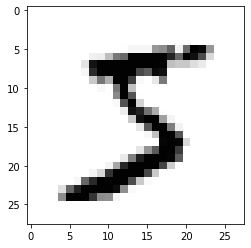

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [4]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write(f'{i}\t')
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [5]:
# 28X28의 2차원 배열을 184개의 1차원 배열로 바꾸어 주기 위함
X_train = X_train.reshape(X_train.shape[0], 784)

X_train = X_train.astype('float64')
X_train = X_train / 255.

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255.

print(f'class : {Y_class_train[0]}')

class : 5


In [6]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##### 딥러닝 기본 프레임 만들기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [8]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = 'model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

model_path = 'model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = model_path,
                               monitor = 'val_loss',
                               verbose = 1,
                               save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss',
                                       patience = 10)

In [9]:
history = model.fit(X_train, Y_train,
                   validation_data = (X_test, Y_test),
                   epochs = 30,
                   batch_size = 200,
                   verbose = 0,
                   callbacks = [early_stopping_callback ,checkpointer])

print(f'\nTest Accuracy : {model.evaluate(X_test, Y_test)[1] : .4f}')


Epoch 00001: val_loss improved from inf to 0.14843, saving model to model/01-0.1484.hdf5

Epoch 00002: val_loss improved from 0.14843 to 0.10383, saving model to model/02-0.1038.hdf5

Epoch 00003: val_loss improved from 0.10383 to 0.08239, saving model to model/03-0.0824.hdf5

Epoch 00004: val_loss improved from 0.08239 to 0.07577, saving model to model/04-0.0758.hdf5

Epoch 00005: val_loss improved from 0.07577 to 0.06866, saving model to model/05-0.0687.hdf5

Epoch 00006: val_loss did not improve from 0.06866

Epoch 00007: val_loss improved from 0.06866 to 0.06713, saving model to model/07-0.0671.hdf5

Epoch 00008: val_loss improved from 0.06713 to 0.06241, saving model to model/08-0.0624.hdf5

Epoch 00009: val_loss did not improve from 0.06241

Epoch 00010: val_loss did not improve from 0.06241

Epoch 00011: val_loss did not improve from 0.06241

Epoch 00012: val_loss improved from 0.06241 to 0.06219, saving model to model/12-0.0622.hdf5

Epoch 00013: val_loss did not improve from 

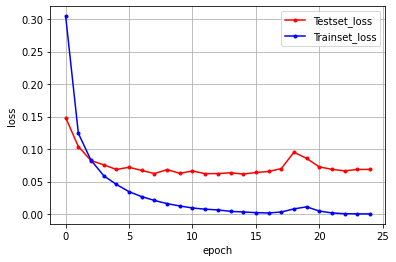

In [10]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##### 더 깊은 딥러닝
CNN(Convolution Neural Network)

##### 컨볼루션 신경망(CNN)
CNN(n).png 참고  
- model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu)

##### 맥스풀링

풀링 , 서브 샘플링 : 결과가 크고 복잡하면 다시 한번 축소하는 과정

- 맥스 풀링(max pooling) : 정해진 구역 안에서 최댓값을 뽑아냄
- 평균 풀링(average pooling) : 정해진 구역 안에서 평균값을 뽑아냄

maxpooling.png 참고
- model.add(MaxPooling2D(pool_size = 2))


- 드롭아웃 : 과적합을 방지하기 위해 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것

dropout.png 참고
- model.add(Dropout(0.25))

플래튼(Flatten) : 활성화 함수를 사용하기 위해 다차원 배열을 1차원 배열로 바꿔줌

- model.add(Flatten())

##### 컨볼루션 신경망 실행하기


Epoch 00001: val_loss improved from inf to 0.05644, saving model to model/01-0.0564.hdf5

Epoch 00002: val_loss improved from 0.05644 to 0.04241, saving model to model/02-0.0424.hdf5

Epoch 00003: val_loss improved from 0.04241 to 0.03643, saving model to model/03-0.0364.hdf5

Epoch 00004: val_loss improved from 0.03643 to 0.03128, saving model to model/04-0.0313.hdf5

Epoch 00005: val_loss improved from 0.03128 to 0.02878, saving model to model/05-0.0288.hdf5

Epoch 00006: val_loss improved from 0.02878 to 0.02720, saving model to model/06-0.0272.hdf5

Epoch 00007: val_loss improved from 0.02720 to 0.02702, saving model to model/07-0.0270.hdf5

Epoch 00008: val_loss did not improve from 0.02702

Epoch 00009: val_loss did not improve from 0.02702

Epoch 00010: val_loss improved from 0.02702 to 0.02640, saving model to model/10-0.0264.hdf5

Epoch 00011: val_loss did not improve from 0.02640

Epoch 00012: val_loss improved from 0.02640 to 0.02630, saving model to model/12-0.0263.hdf5

E

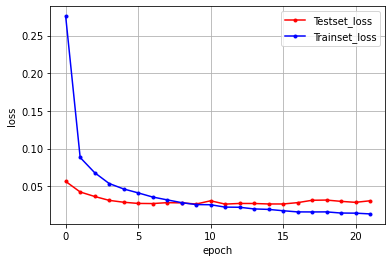

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed  = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64 , (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델 최적화 설정
MODEL_DIR = 'model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = 'model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, 
                               monitor = 'val_loss',
                               verbose = 1,
                               save_best_only = True)

early_stoppin_callback = EarlyStopping(monitor = 'val_loss',
                                       patience = 10)

# 모델의 실행
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    epochs = 30,
                    batch_size = 200,
                    verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print(f'\nTest Accuracy : {model.evaluate(X_test, y_test)[1] :.4f}')

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()